In [ ]:
install.packages('astsa')
install.packages('isdals')
install.packages('ppcor')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

N = 1000;
phi <- 0.4;
Z <- rnorm(N, 0, 1);
X <- NULL;
X[1] = Z[1];

for (t in 2:N){
    X[t] = Z[t] + phi*X[t-1]
}

In [ ]:
X.ts = ts(X)

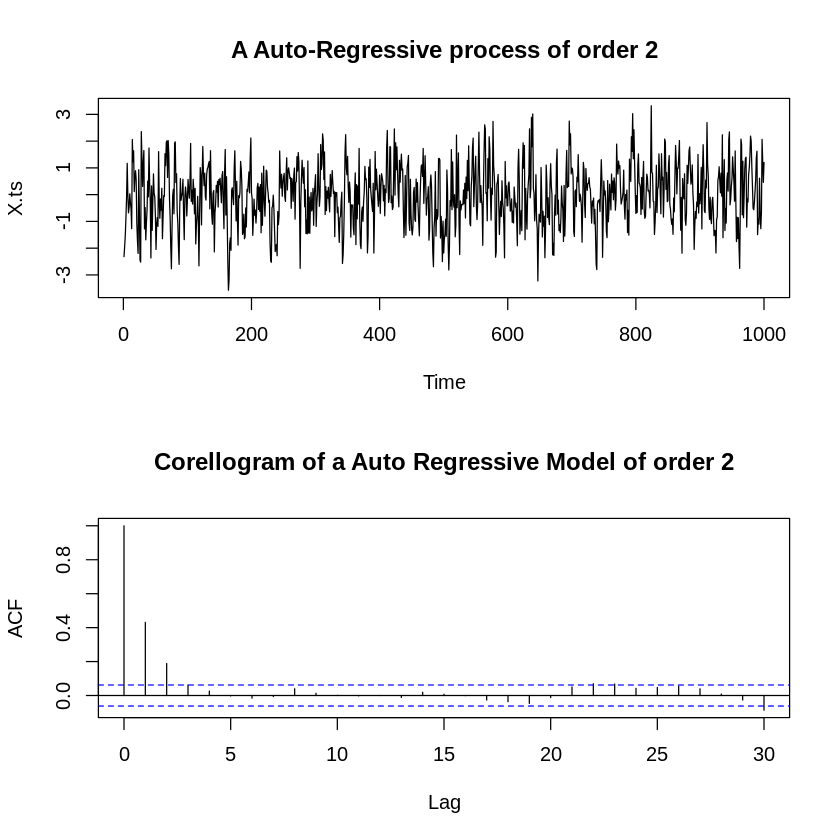

In [ ]:
par(mfrow = c(2,1))

plot(X.ts, main = 'A Auto-Regressive process of order 2')
acf(X.ts, main = 'Corellogram of a Auto Regressive Model of order 2')

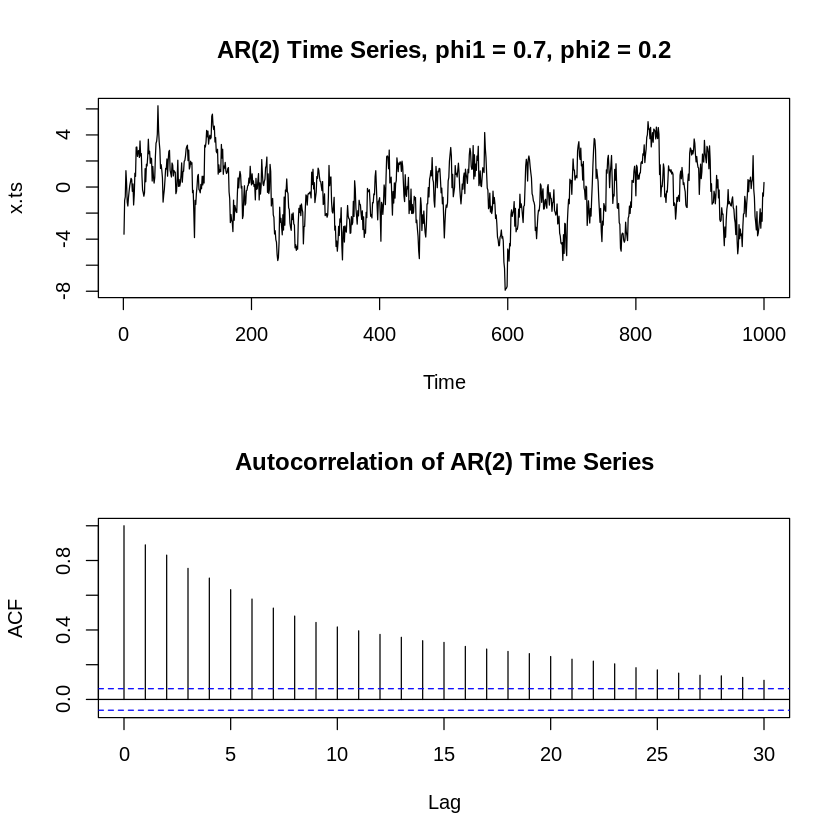

In [ ]:
x.ts <- arima.sim(list(ar = c(0.7, 0.2)), n = 1000)
par(mfrow = c(2, 1))
plot(x.ts, main = "AR(2) Time Series, phi1 = 0.7, phi2 = 0.2")
acf(x.ts, main = "Autocorrelation of AR(2) Time Series")

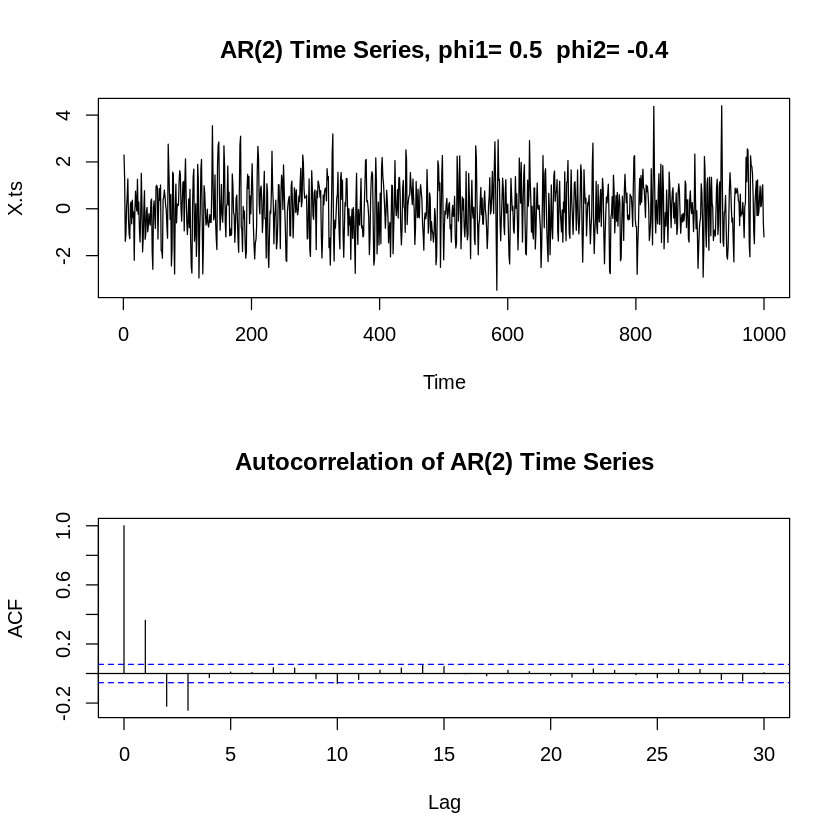

In [ ]:
phi1 <- 0.5;
phi2 <- -0.4;
X.ts <- arima.sim(list(ar = c(phi1, phi2)), n = 1000)
par(mfrow = c(2, 1))
plot(X.ts, main = paste("AR(2) Time Series, phi1=", phi1, " phi2=", phi2))
acf(X.ts, main = "Autocorrelation of AR(2) Time Series")

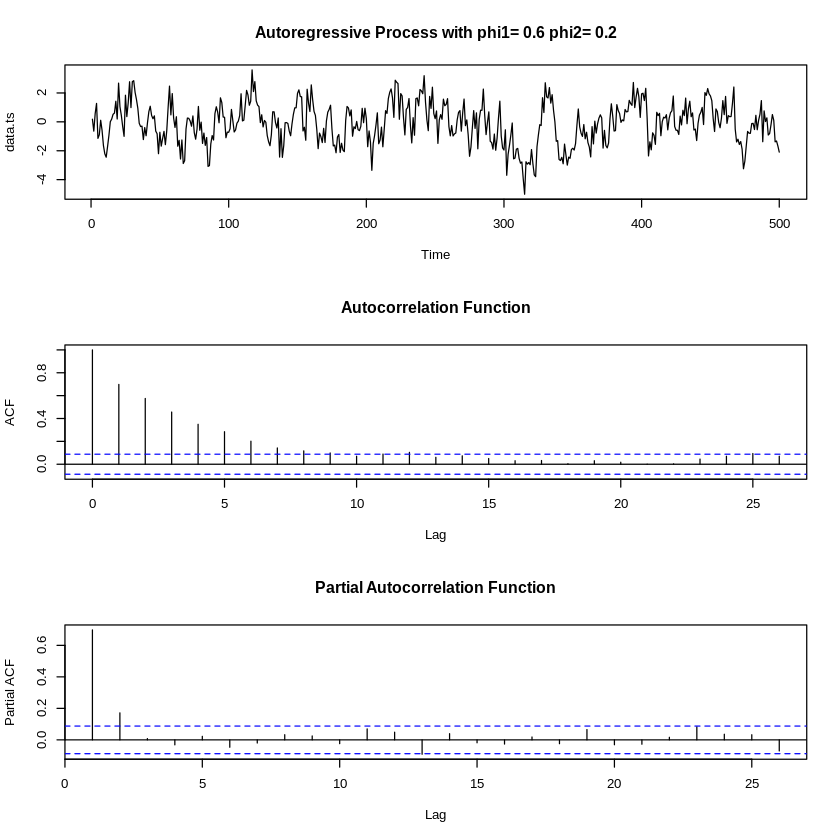

In [ ]:
par(mfrow = c(3,1))
phi.1 = 0.6; phi.2 = 0.2;
data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2)))
plot(data.ts, main = paste("Autoregressive Process with phi1=", phi.1, "phi2=", phi.2))
acf(data.ts, main="Autocorrelation Function")
acf(data.ts, type = "partial", main = "Partial Autocorrelation Function")

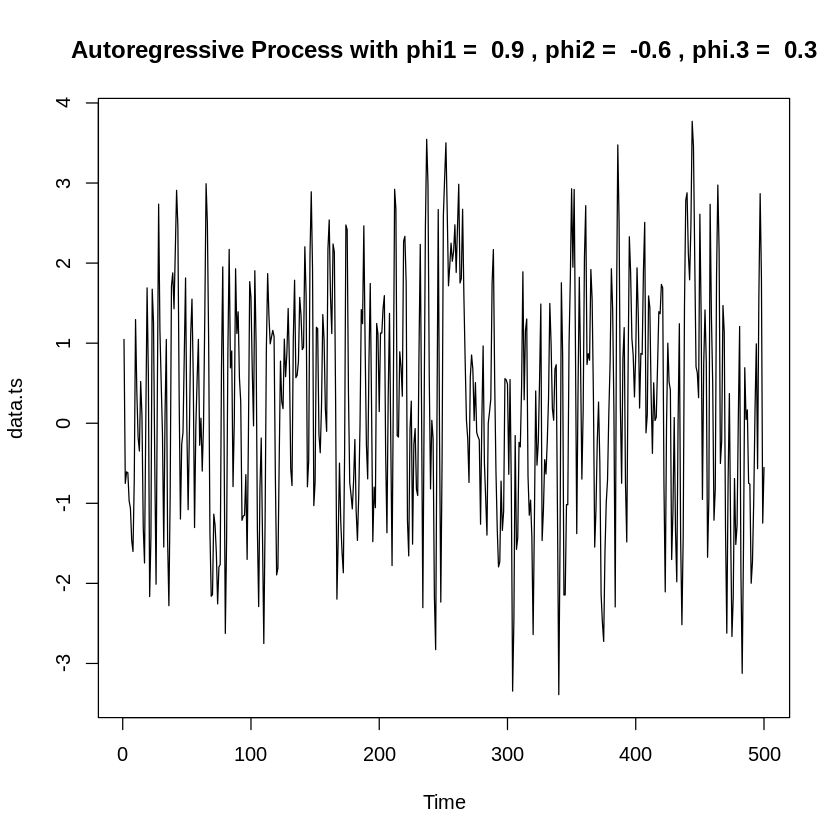

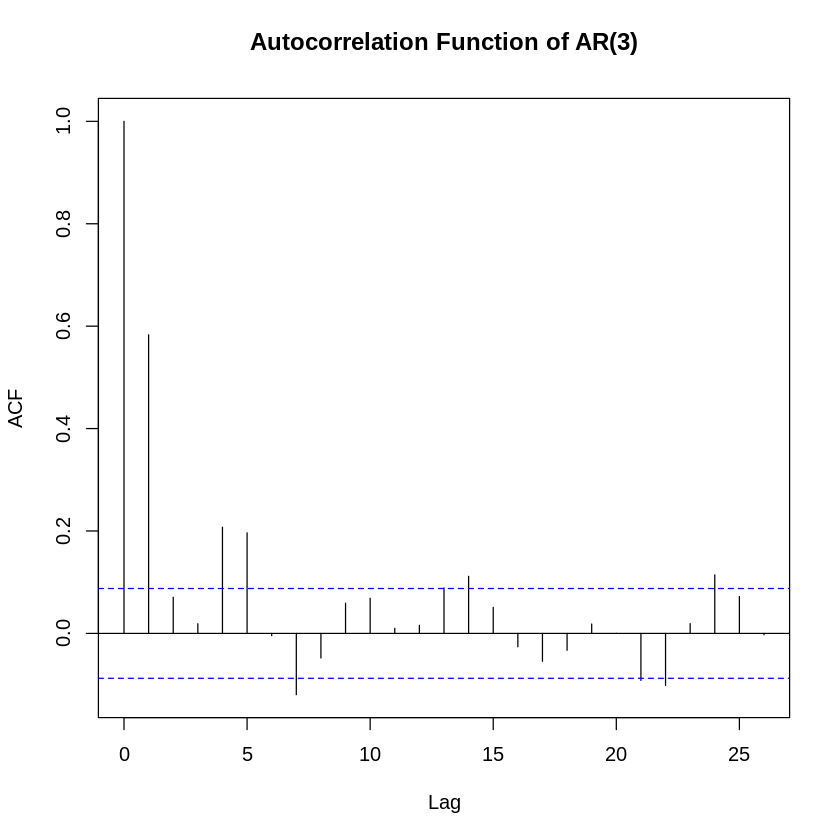

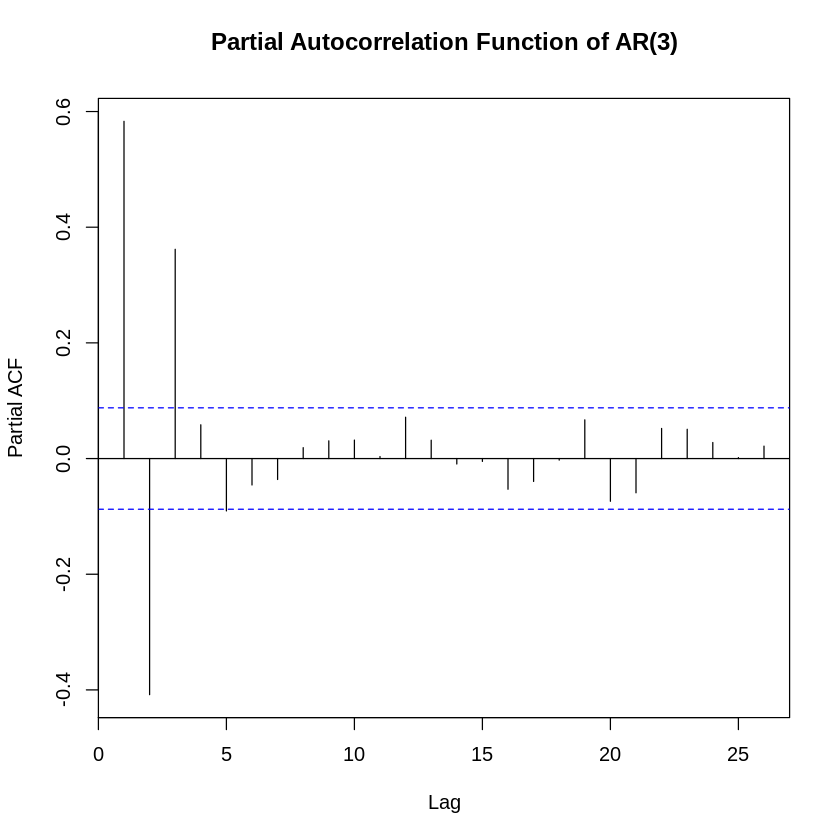

In [ ]:
phi.1 = 0.9; phi.2 = -0.6; phi.3 = 0.3
data.ts = arima.sim(n= 500, list(ar = c(phi.1, phi.2, phi.3)))
plot(data.ts, main = paste("Autoregressive Process with phi1 = ", phi.1, ", phi2 = ", phi.2, ", phi.3 = ", phi.3))
acf(data.ts, main="Autocorrelation Function of AR(3)")
acf(data.ts, type = "partial", main = "Partial Autocorrelation Function of AR(3)")


,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.8432654,0.8780896,0.1424440
Triceps,0.8432654,1.0000000,0.9238425,0.4577772
Thigh,0.8780896,0.9238425,1.0000000,0.0846675
Midarm,0.1424440,0.4577772,0.0846675,1.0000000


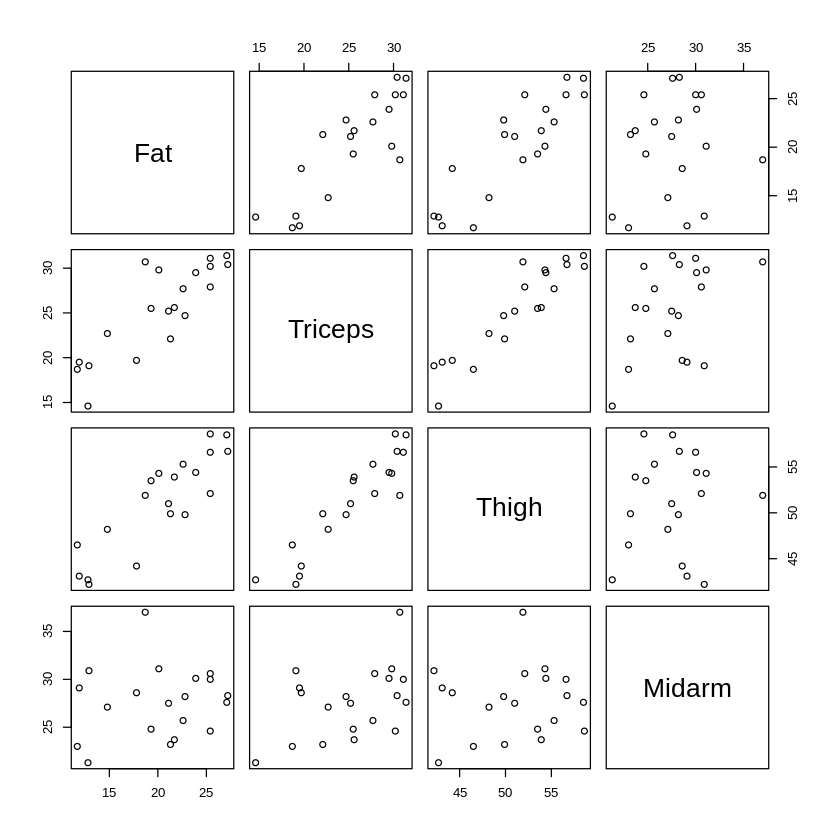

In [ ]:
library(isdals)
data(bodyfat)
attach(bodyfat)
pairs(cbind(Fat, Triceps, Thigh, Midarm))
cor( cbind(Fat, Triceps,Thigh,Midarm) )

In [ ]:
Fat.hat = predict(lm(Fat~Thigh))
Triceps.hat = predict(lm(Triceps~Thigh))
cor((Fat-Fat.hat), (Triceps-Triceps.hat))

[1] 0.1749822

In [ ]:
library(ppcor)
pcor(cbind(Fat, Triceps, Thigh))


Loading required package: MASS



,Fat,Triceps,Thigh
Fat,1.0000000,0.1749822,0.4814109
Triceps,0.1749822,1.0000000,0.7130120
Thigh,0.4814109,0.7130120,1.0000000
,Fat,Triceps,Thigh
Fat,0.00000000,0.4736789763,0.0368987227
Triceps,0.47367898,0.0000000000,0.0006109801
Thigh,0.03689872,0.0006109801,0.0000000000
,Fat,Triceps,Thigh
Fat,0.0000000,0.7327755,2.264597
Triceps,0.7327755,0.0000000,4.192849


In [ ]:
Fat.hat = predict(lm(Fat~Thigh+Midarm))
Triceps.hat = predict(lm(Triceps~Thigh+Midarm))
cor((Fat-Fat.hat), (Triceps-Triceps.hat))

[1] 0.33815

In [ ]:
pcor(cbind(Fat, Triceps, Thigh, Midarm))

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.3381500,-0.2665991,-0.3240520
Triceps,0.3381500,1.0000000,0.9963725,0.9955918
Thigh,-0.2665991,0.9963725,1.0000000,-0.9926612
Midarm,-0.3240520,0.9955918,-0.9926612,1.0000000
,Fat,Triceps,Thigh,Midarm
Fat,0.0000000,1.699111e-01,2.848944e-01,1.895628e-01
Triceps,0.1699111,0.000000e+00,1.490492e-18,7.071386e-18
Thigh,0.2848944,1.490492e-18,0.000000e+00,4.134178e-16
Midarm,0.1895628,7.071386e-18,4.134178e-16,0.000000e+00
,Fat,Triceps,Thigh,Midarm


In [ ]:
sigma = 4;
phi[1:2] = c(1/3, 1/2);
n =10000;
set.seed(2017)
ar.process = arima.sim(n, model = list(ar = c(1/3, 1/2)), sd = 4);
print(ar.process[1:5])


[1] 4.087685 5.598492 3.019295 2.442354 5.398302


In [ ]:
r <- NULL
r[1:2] = acf(ar.process, plot=F)$acf[2:3]
print(r)


[1] 0.6814103 0.7255825


In [ ]:
R <- NULL
R <- matrix(1, 2, 2)
R[1, 2] = r[1]
R[2, 1] = r[1]
print(R)

          [,1]      [,2]
[1,] 1.0000000 0.6814103
[2,] 0.6814103 1.0000000


In [ ]:
b = matrix(r, 2, 1)
print(b)

          [,1]
[1,] 0.6814103
[2,] 0.7255825


In [ ]:
phi.hat = solve(R, b)
print(phi.hat)

          [,1]
[1,] 0.3490720
[2,] 0.4877212


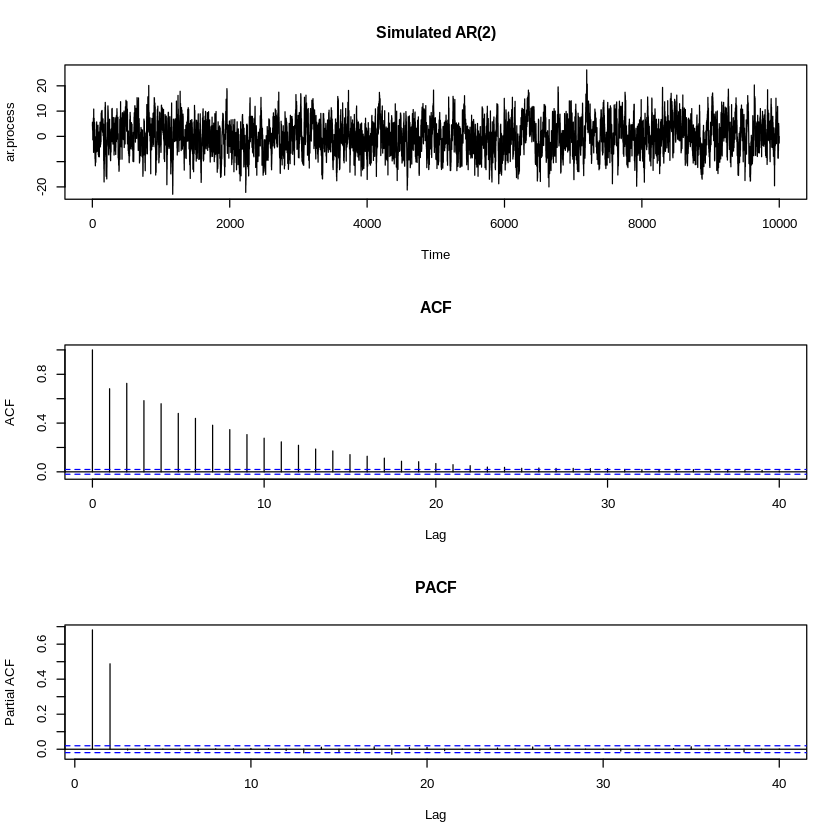

In [ ]:
c0 = acf(ar.process, type = 'covariance', plot = F)$acf[1]
var.hat = c0*(1 - sum(phi.hat*r))
par(mfrow =c(3,1))
plot(ar.process, main = "Simulated AR(2)")
acf(ar.process, main = "ACF")
pacf(ar.process, main = "PACF")

In [ ]:
set.seed(2017)
sigma = 4
phi = NULL
phi[1:3] = c(1/3, 1/2, 7/100)
n = 100000


In [ ]:
ar3.process = arima.sim(n, model = list(ar = c(1/3, 1/2, 7/100)), sd = 4)

In [ ]:
r = NULL
r[1:3] = acf(ar3.process, plot = F)$acf[2:4]
r

[1] 0.7859646 0.8180901 0.7369167

In [ ]:
R = matrix(1, 3, 3)
R[1, 2] = r[1]
R[1, 3] = r[2]
R[2, 1] = r[1]
R[2, 3] = r[1]
R[3, 1] = r[2]
R[3, 2] = r[1]
R

1.0000000,0.7859646,0.8180901
0.7859646,1.0000000,0.7859646
0.8180901,0.7859646,1.0000000


In [ ]:
b <- matrix(, 3, 1)
b[1, 1] = r[1]
b[2, 1] = r[2]
b[3, 1] = r[3]
b

0.7859646
0.8180901
0.7369167


In [ ]:
phi.hat = solve(R, b)
phi.hat

0.33812448
0.49849991
0.06849712


In [ ]:
c0 = acf(ar3.process, type = 'covariance', plot = F)$acf[1]
var.hat = c0*(1 - sum(phi.hat*r))
var.hat

[1] 15.979

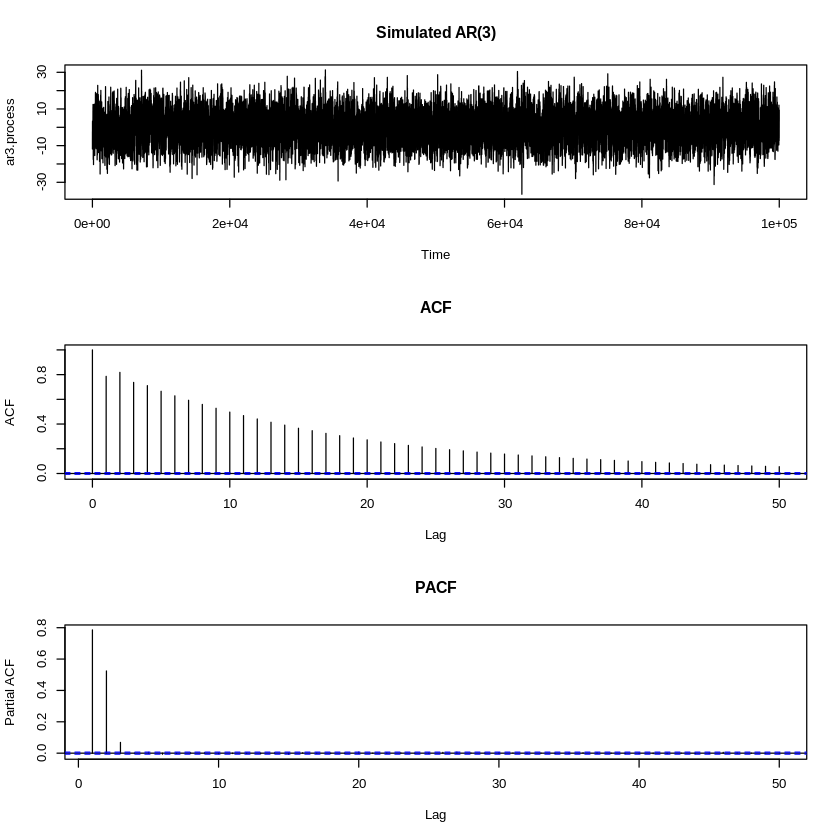

In [ ]:
par(mfrow = c(3, 1))
plot(ar3.process, main = "Simulated AR(3)")
acf(ar3.process, main = "ACF")
pacf(ar3.process, main = "PACF")

In [ ]:
r <- NULL
r[1:3] = c(0.8, 0.6, 0.2)
b <- matrix(, 3, 1)
b[1, 1] = r[1]
b[2, 1] = r[2]
b[3, 1] = r[3]
R = matrix(1, 3, 3)
R[1, 2] = r[1]
R[1, 3] = r[2]
R[2, 1] = r[1]
R[2, 3] = r[1]
R[3, 1] = r[2]
R[3, 2] = r[1]
phi.hat = solve(R, b)
phi.hat


0.8125
0.5000
-0.6875


In [ ]:
c0 = 5
var.hat = c0*(1 - sum(phi.hat*r))
var.hat

[1] 0.9375

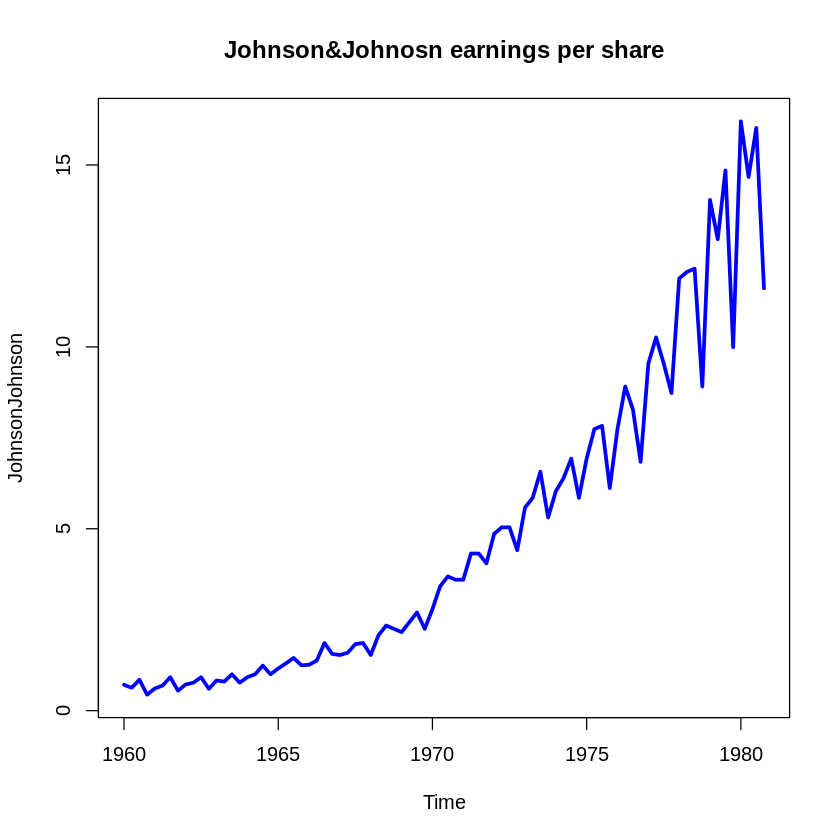

In [ ]:
# Time plot for Johnson&Johnson
plot(JohnsonJohnson, main='Johnson&Johnosn earnings per share', col='blue', lwd=3)

In [ ]:
# log-return of Johnson&Johnson

jj.log.return=diff(log(JohnsonJohnson))
jj.log.return.mean.zero=jj.log.return-mean(jj.log.return)

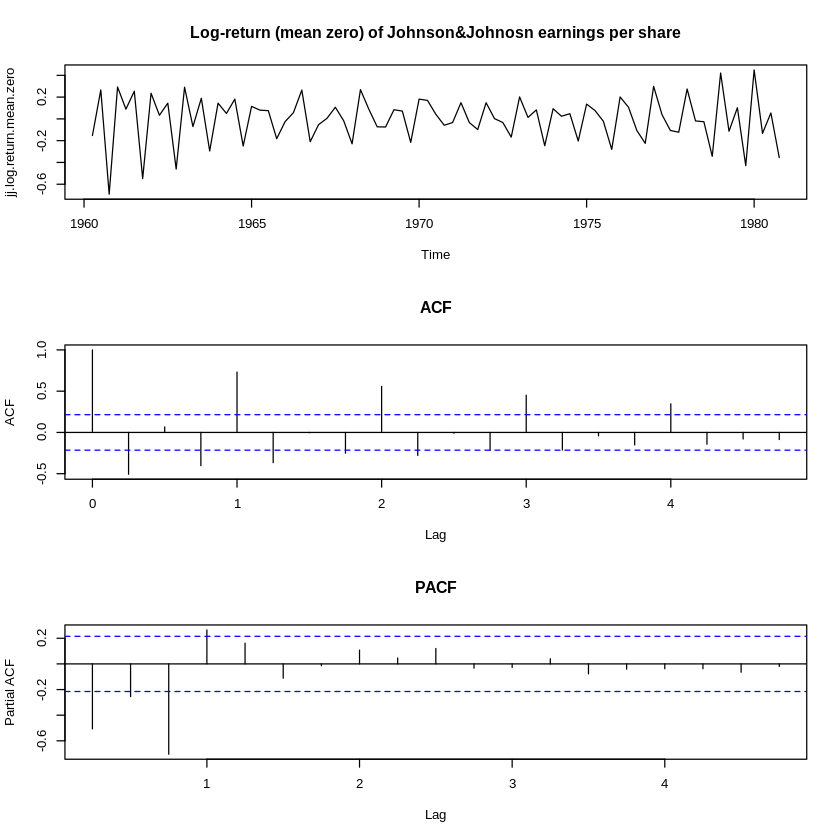

In [ ]:
# Plots for log-returns
par(mfrow=c(3,1))
plot(jj.log.return.mean.zero, main='Log-return (mean zero) of Johnson&Johnosn earnings per share')
acf(jj.log.return.mean.zero, main='ACF')
pacf(jj.log.return.mean.zero, main='PACF')

In [ ]:
# Order
p=4

In [ ]:
# sample autocorreleation function r
r=NULL
r[1:p]=acf(jj.log.return.mean.zero, plot=F)$acf[2:(p+1)]
r

[1] -0.50681760  0.06710084 -0.40283604  0.73144780

In [ ]:
# matrix R
R=matrix(1,p,p) # matrix of dimension 4 by 4, with entries all 1's.

# define non-diagonal entires of R
for(i in 1:p){
	for(j in 1:p){
		if(i!=j)
			R[i,j]=r[abs(i-j)]
		}
	}
R

1.00000000,-0.50681760,0.06710084,-0.40283604
-0.50681760,1.00000000,-0.50681760,0.06710084
0.06710084,-0.50681760,1.00000000,-0.50681760
-0.40283604,0.06710084,-0.50681760,1.00000000


In [ ]:
# b-column vector on the right
b=matrix(r,p,1)# b- column vector with no entries
b

-0.50681760
0.06710084
-0.40283604
0.73144780


In [ ]:
phi.hat=solve(R,b)[,1]
phi.hat

[1] -0.6293492 -0.5171526 -0.4883374  0.2651266

In [ ]:
# Variance estimation using Yule-Walker Estimator
c0=acf(jj.log.return.mean.zero, type='covariance', plot=F)$acf[1]
c0
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 0.04365692

[1] 0.01419242

In [ ]:
# Constant term in the model
phi0.hat=mean(jj.log.return)*(1-sum(phi.hat))
phi0.hat

[1] 0.079781

In [ ]:
cat("Constant:", phi0.hat," Coeffcinets:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 0.079781  Coeffcinets: -0.6293492 -0.5171526 -0.4883374 0.2651266  and Variance: 0.01419242 


In [ ]:
install.packages('palmerpenguins')
library('palmerpenguins')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('ggplot2')
library('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Removed 2 rows containing missing values (geom_point).”


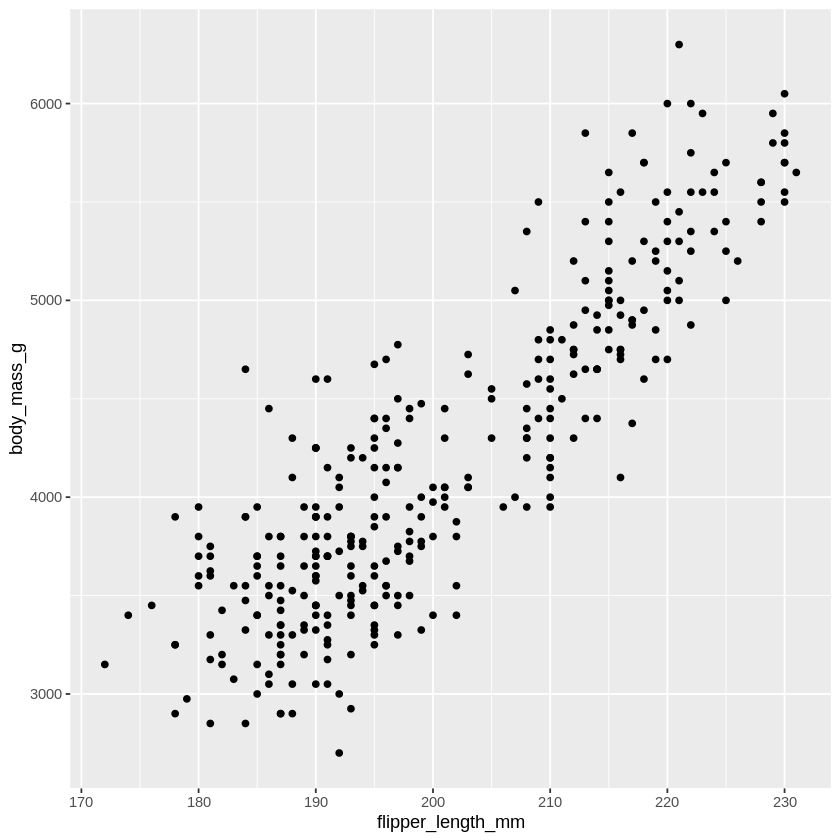

In [ ]:
ggplot(data = penguins, aes(x=flipper_length_mm, y = body_mass_g))+ geom_point()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


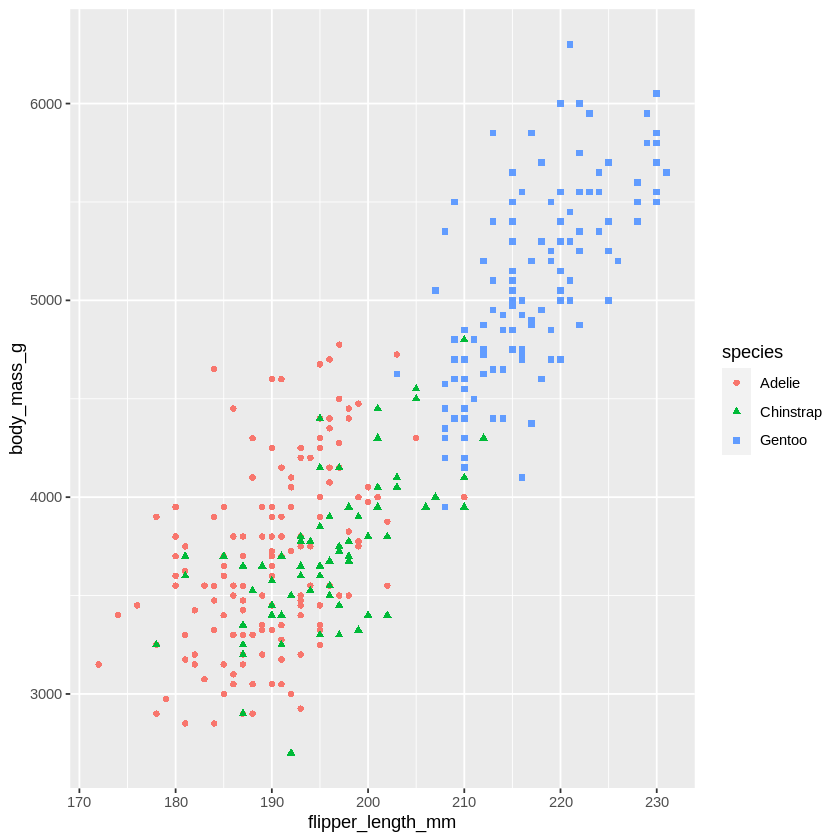

In [ ]:
ggplot(data = penguins, aes(x=flipper_length_mm, y = body_mass_g))+ geom_point(aes(color = species, shape = species))

Warning message:
“Removed 2 rows containing missing values (geom_point).”


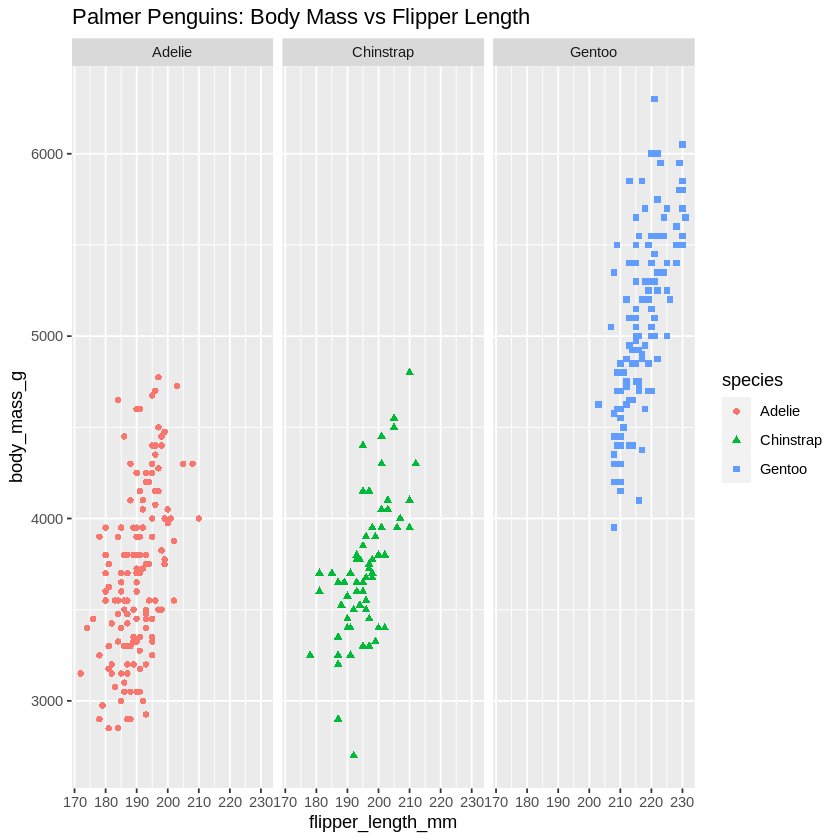

In [ ]:
ggplot(data = penguins, aes(x=flipper_length_mm, y = body_mass_g))+ geom_point(aes(color = species, shape = species)) + facet_wrap(~species) + labs(title = "Palmer Penguins: Body Mass vs Flipper Length")

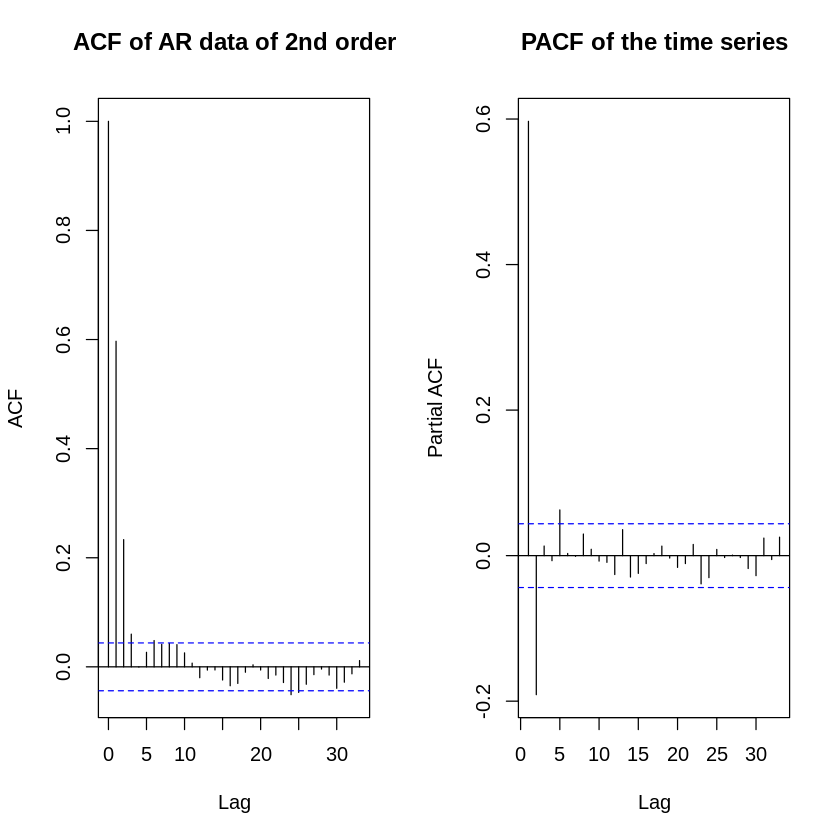

In [ ]:
#A Simulation Example
set.seed(43)
data = arima.sim(list(order = c(2, 0, 0), ar=c(0.7, -0.2)), n = 2000)
par(mfrow = c(1, 2))
acf(data, main = "ACF of AR data of 2nd order")
acf(data, type = "partial", main = "PACF of the time series")

In [ ]:
arima(data, order =c(2, 0, 0), include.mean = FALSE)


Call:
arima(x = data, order = c(2, 0, 0), include.mean = FALSE)

Coefficients:
         ar1      ar2
      0.7111  -0.1912
s.e.  0.0219   0.0220

sigma^2 estimated as 0.9985:  log likelihood = -2836.64,  aic = 5679.27

In [ ]:
set.seed(500)
data = arima.sim(list(order =c(1, 0, 1), ar = 0.7, ma = 0.2), n = 1000000)

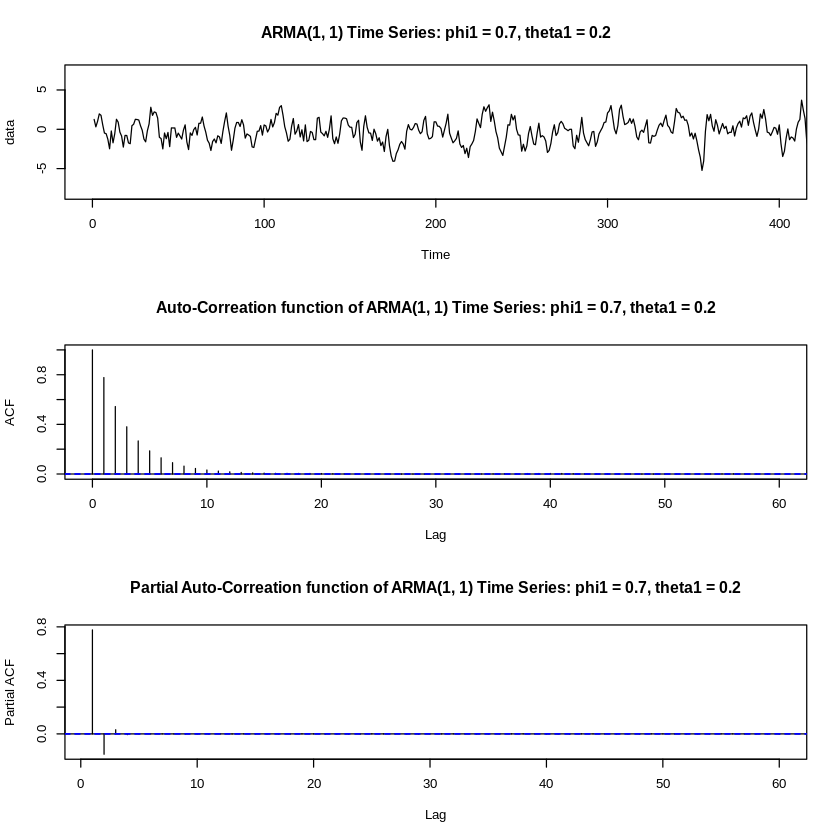

In [ ]:
par(mfcol = c(3, 1))
plot(data, main = "ARMA(1, 1) Time Series: phi1 = 0.7, theta1 = 0.2", xlim = c(0, 400)) #First_Terms
acf(data, main = "Auto-Correation function of ARMA(1, 1) Time Series: phi1 = 0.7, theta1 = 0.2")
acf(data, type= "partial", main = "Partial Auto-Correation function of ARMA(1, 1) Time Series: phi1 = 0.7, theta1 = 0.2")

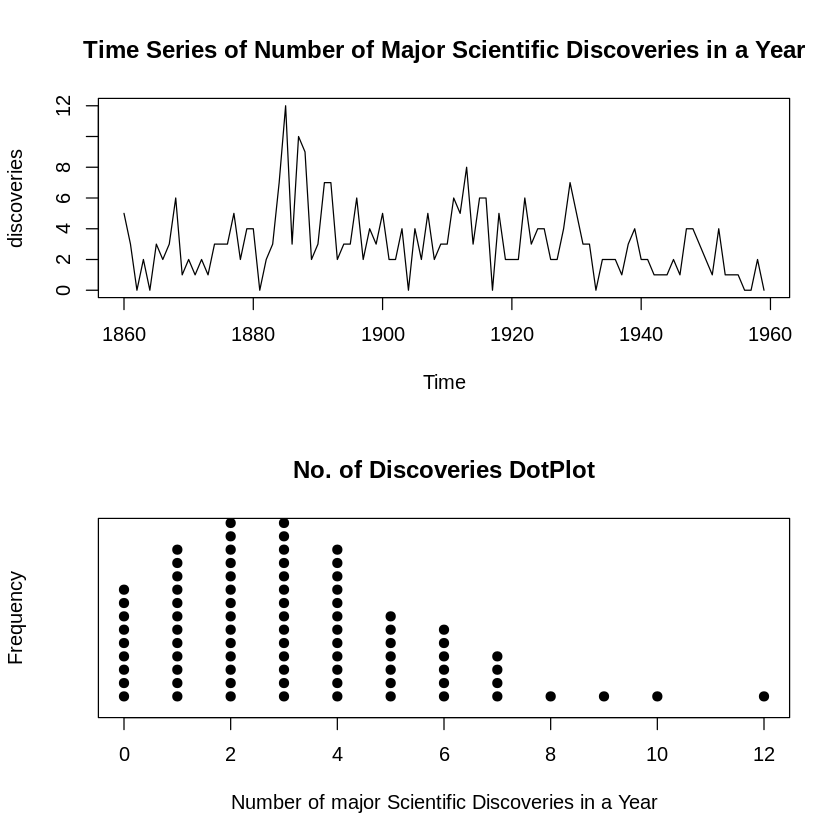

In [ ]:
#ARMA(p, q) Example: Discoveries
par(mfrow = c(2, 1))

plot(discoveries, main = "Time Series of Number of Major Scientific Discoveries in a Year")

stripchart(discoveries, method = "stack", offset = 0.5, at = 0.15, pch = 19, main = "No. of Discoveries DotPlot", xlab = "Number of major Scientific Discoveries in a Year", ylab = "Frequency")

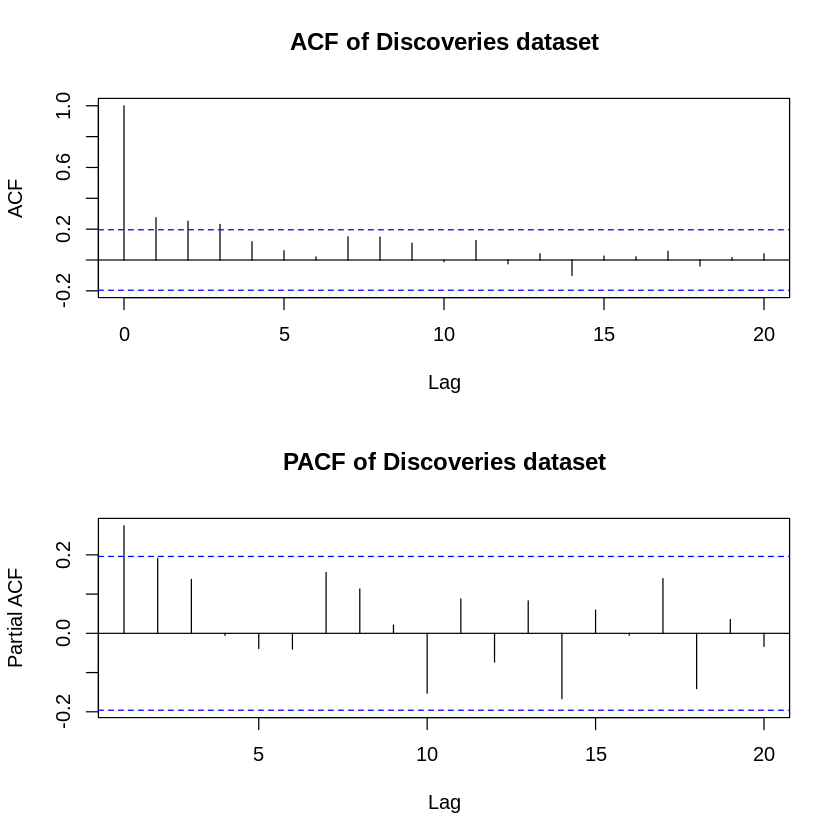

In [ ]:
par(mfrow = c(2, 1))
acf(discoveries, main = "ACF of Discoveries dataset")
acf(discoveries, type = "partial", main = "PACF of Discoveries dataset")

In [ ]:
#Read data to R variable
birth.data <- read.csv("/content/Daily Birth Dataset.csv")

In [ ]:
#Pull out number of births column-
number_of_births <- birth.data$Daily.total.female.births.in.California..1959

#Use date format for dates-
birth.data$Date <- as.Date(birth.data$Date, "%m/%d/%Y")

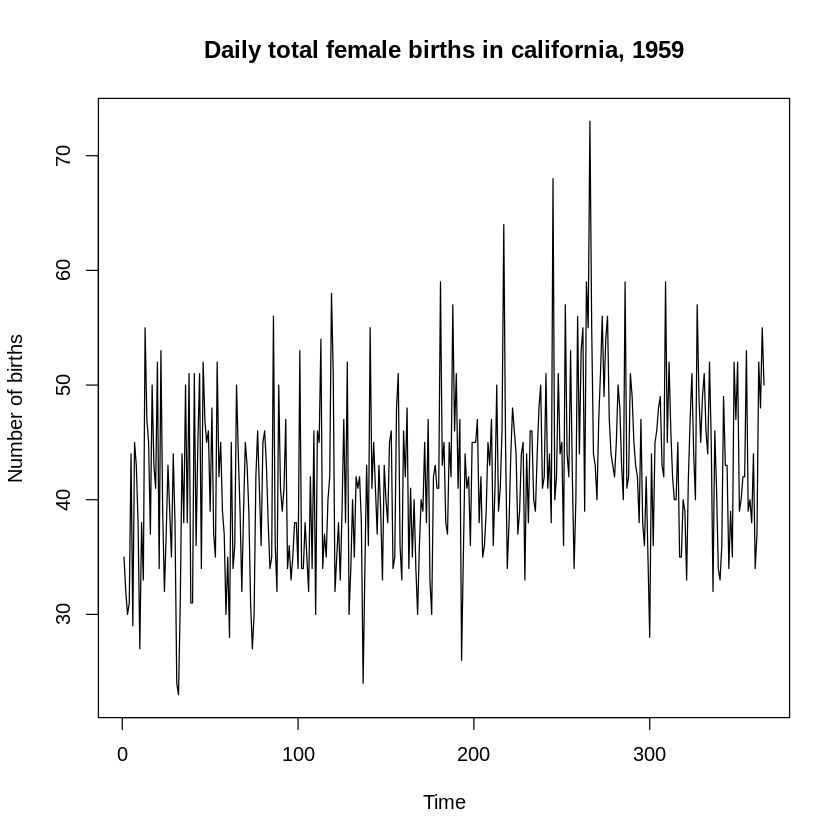

In [ ]:
#Plot the series

plot.ts(number_of_births,main='Daily total female births in california, 1959', ylab = 'Number of births')

In [ ]:
#Test for correlation

Box.test(number_of_births, lag = log(length(number_of_births)))


	Box-Pierce test

data:  number_of_births
X-squared = 36.391, df = 5.8999, p-value = 2.088e-06


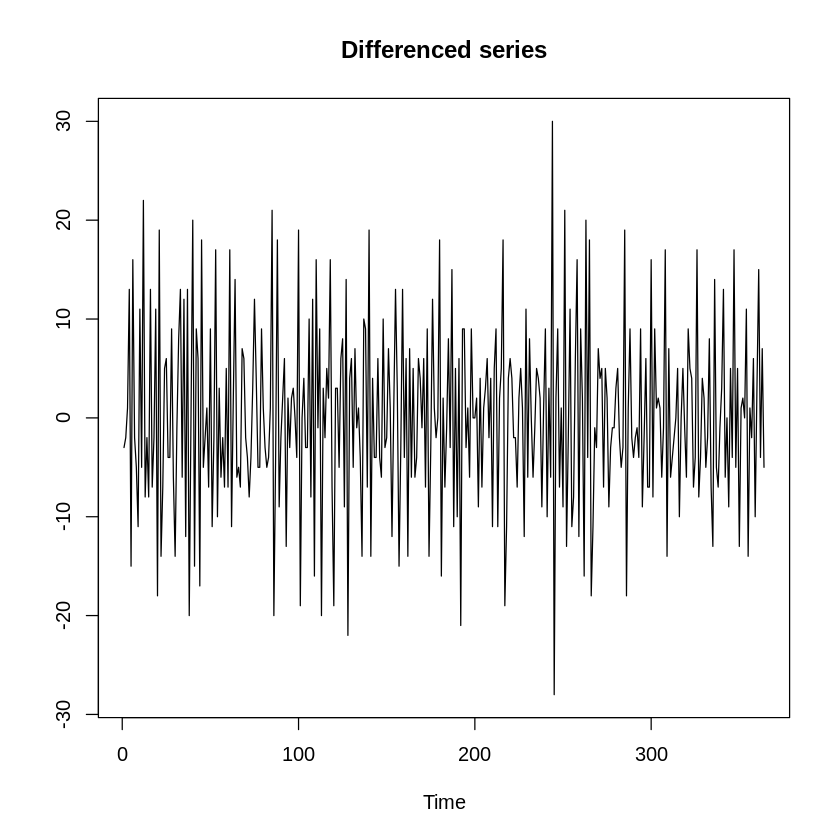

In [ ]:
#Plot the differenced data
plot.ts(diff(number_of_births), main = 'Differenced series', ylab = '')

In [ ]:
# Test for correlation in the differenced data
Box.test(diff(number_of_births), lag = log(length(diff(number_of_births))))


	Box-Pierce test

data:  diff(number_of_births)
X-squared = 78.094, df = 5.8972, p-value = 7.661e-15


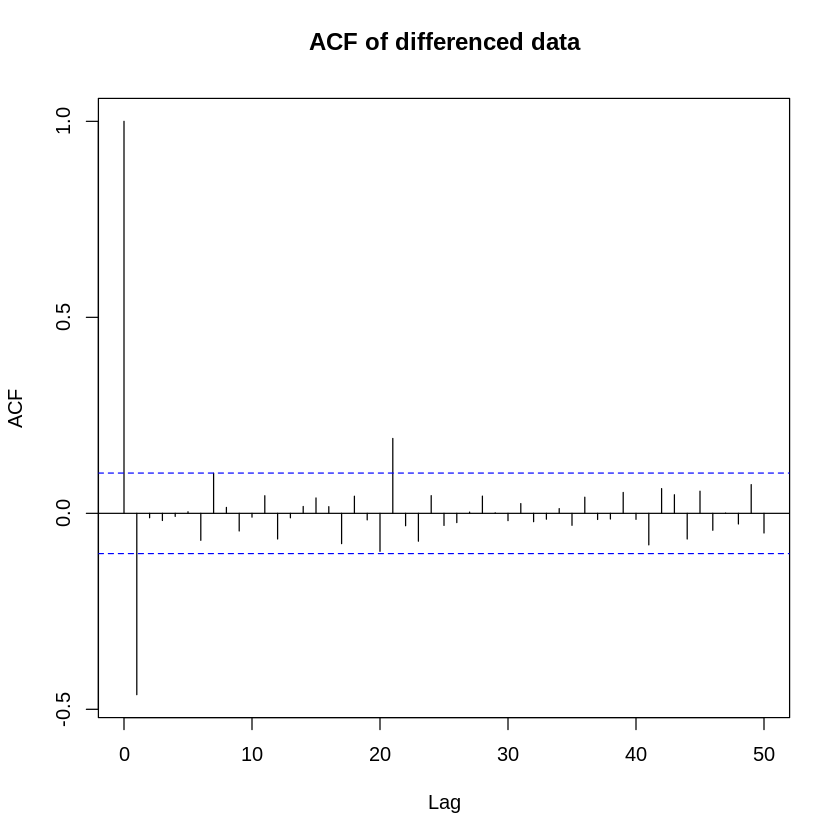

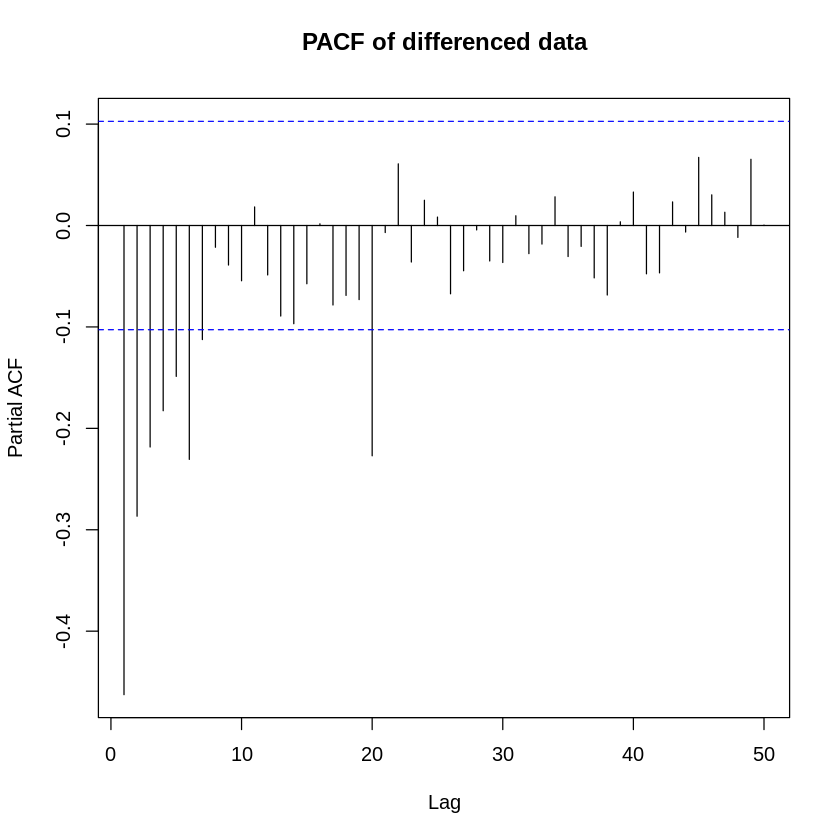

In [ ]:
acf(diff(number_of_births), main='ACF of differenced data', 50)
pacf(diff(number_of_births), main='PACF of differenced data', 50)

In [ ]:
# Fit various ARIMA models


model1<-arima(number_of_births, order=c(0,1,1))
SSE1<-sum(model1$residuals^2)
model1.test<-Box.test(model1$residuals, lag = log(length(model1$residuals)))

model2<-arima(number_of_births, order=c(0,1,2))
SSE2<-sum(model2$residuals^2)
model2.test<-Box.test(model2$residuals, lag = log(length(model2$residuals)))

model3<-arima(number_of_births, order=c(7,1,1))
SSE3<-sum(model3$residuals^2)
model3.test<-Box.test(model3$residuals, lag = log(length(model3$residuals)))

model4<-arima(number_of_births, order=c(7,1,2))
SSE4<-sum(model4$residuals^2)
model4.test<-Box.test(model4$residuals, lag = log(length(model4$residuals)))

df<-data.frame(row.names=c('AIC', 'SSE', 'p-value'), c(model1$aic, SSE1, model1.test$p.value), 
               c(model2$aic, SSE2, model2.test$p.value), c(model3$aic, SSE3, model3.test$p.value),
               c(model4$aic, SSE4, model4.test$p.value))
colnames(df)<-c('Arima(0,1,1)','Arima(0,1,2)', 'Arima(7,1,1)', 'Arima(7,1,2)')



format(df, scientific=FALSE)

,"Arima(0,1,1)","Arima(0,1,2)","Arima(7,1,1)","Arima(7,1,2)"
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
AIC,2462.2207021,2459.5705306,2464.8827225,2466.6664136
SSE,18148.4561632,17914.6513437,17584.3902548,17574.0578107
p-value,0.5333604,0.9859227,0.9999899,0.9999929


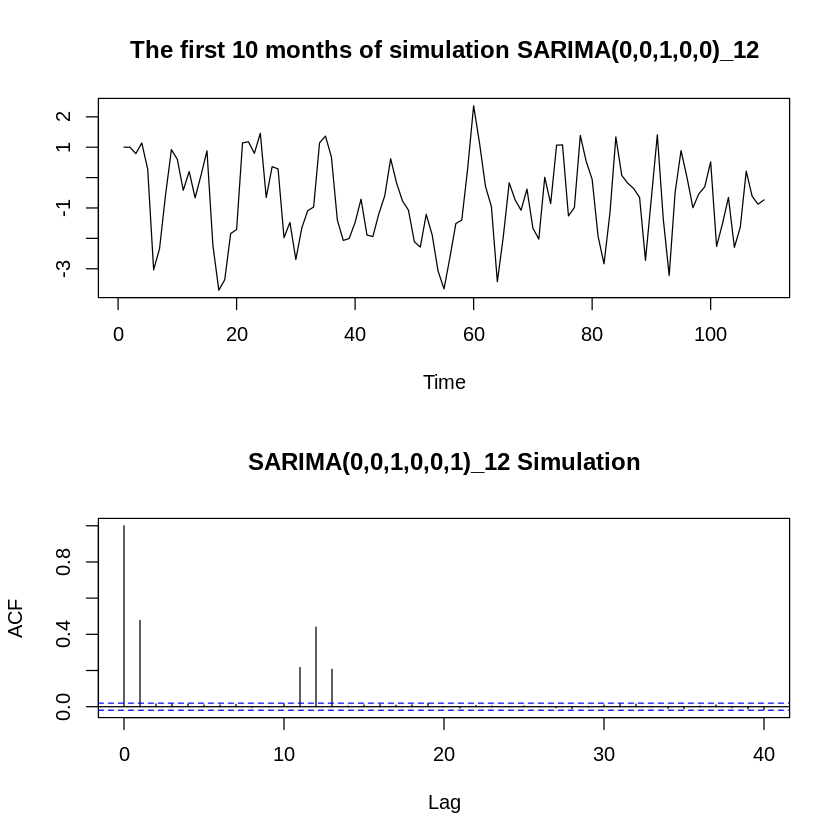

In [ ]:
x=NULL
z=NULL
n=10000

z=rnorm(n)
x[1:13]=1

for(i in 14:n){
  x[i]<-z[i]+0.7*z[i-1]+0.6*z[i-12]+0.42*z[i-13]
}

par(mfrow=c(2,1))
plot.ts(x[12:120], main='The first 10 months of simulation SARIMA(0,0,1,0,0)_12', ylab='') 

acf(x, main='SARIMA(0,0,1,0,0,1)_12 Simulation')

In [ ]:
library(astsa)

d=1
DD=1

per=4

for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:2){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(jj), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}



0 1 0 0 1 0 4 AIC= -124.0685  SSE= 0.9377871  p-VALUE= 0.0002610795 
0 1 0 0 1 1 4 AIC= -126.3493  SSE= 0.8856994  p-VALUE= 0.0001606542 
0 1 0 1 1 0 4 AIC= -125.9198  SSE= 0.8908544  p-VALUE= 0.0001978052 
0 1 0 1 1 1 4 AIC= -124.3648  SSE= 0.8854554  p-VALUE= 0.000157403 
0 1 1 0 1 0 4 AIC= -145.5139  SSE= 0.6891988  p-VALUE= 0.03543717 
0 1 1 0 1 1 4 AIC= -150.7528  SSE= 0.6265214  p-VALUE= 0.6089542 
0 1 1 1 1 0 4 AIC= -150.9134  SSE= 0.6251634  p-VALUE= 0.707918 
0 1 1 1 1 1 4 AIC= -149.1317  SSE= 0.6232876  p-VALUE= 0.6780876 
1 1 0 0 1 0 4 AIC= -139.8248  SSE= 0.7467494  p-VALUE= 0.03503386 
1 1 0 0 1 1 4 AIC= -146.0191  SSE= 0.6692691  p-VALUE= 0.5400176 
1 1 0 1 1 0 4 AIC= -146.0319  SSE= 0.6689661  p-VALUE= 0.5612964 
1 1 0 1 1 1 4 AIC= -144.3766  SSE= 0.6658382  p-VALUE= 0.5459445 
1 1 1 0 1 0 4 AIC= -145.8284  SSE= 0.667109  p-VALUE= 0.2200484 
1 1 1 0 1 1 4 AIC= -148.7706  SSE= 0.6263677  p-VALUE= 0.594822 
1 1 1 1 1 0 4 AIC= -148.9175  SSE= 0.6251104  p-VALUE= 0.719547 
1

initial  value -2.237259 
iter   2 value -2.429075
iter   3 value -2.446738
iter   4 value -2.455821
iter   5 value -2.459761
iter   6 value -2.462511
iter   7 value -2.462602
iter   8 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
final  value -2.462749 
converged
initial  value -2.411490 
iter   2 value -2.412022
iter   3 value -2.412060
iter   4 value -2.412062
iter   4 value -2.412062
iter   4 value -2.412062
final  value -2.412062 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    include.mean = !no.constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
          ma1     sar1
      -0.6796  -0.3220
s.e.   0.0969   0.1124

sigma^2 estimated as 0.007913:  log likelihood = 78.46,  aic = -150.91

$degrees_of_freedom
[1] 77

$ttable
     Estimate     SE t.value p.value
ma1   -0.6796 0.0969 -7.0104  0.0000
sar1  -0.3220 0.1124 -2.8641  0.0054

$AIC
[1] -1.910297

$AICc
[1] -1.908298

$BIC
[1] -1.820318


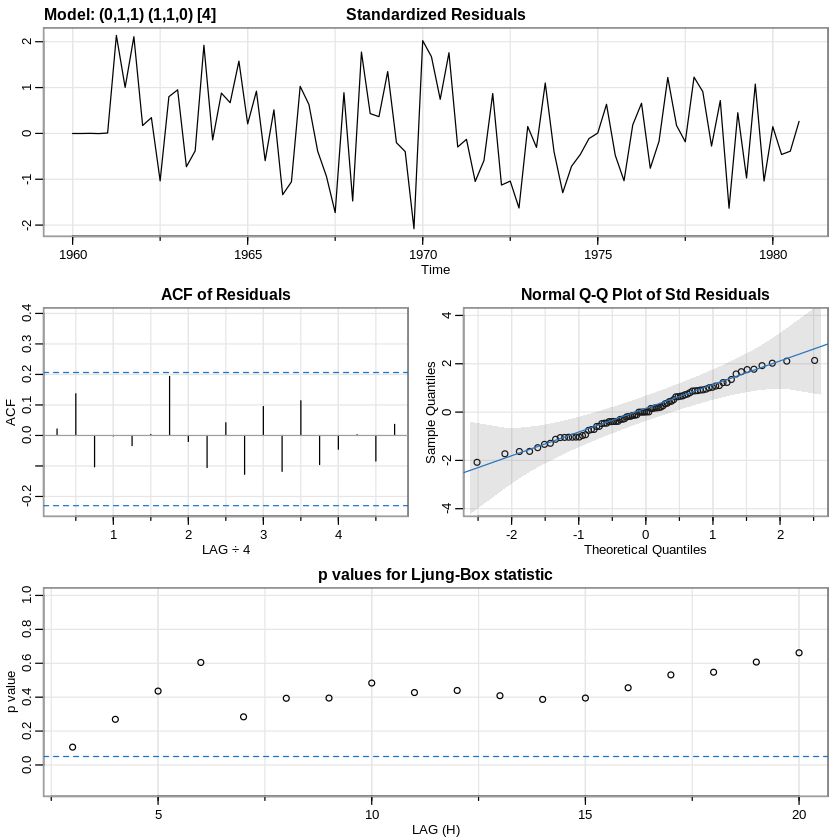

In [ ]:
library(astsa)

sarima(log(jj), 0,1,1,1,1,0,4)

In [ ]:
rain.data <- scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat", skip = 1)
rain.ts <- ts(rain.data, start = c(1813))

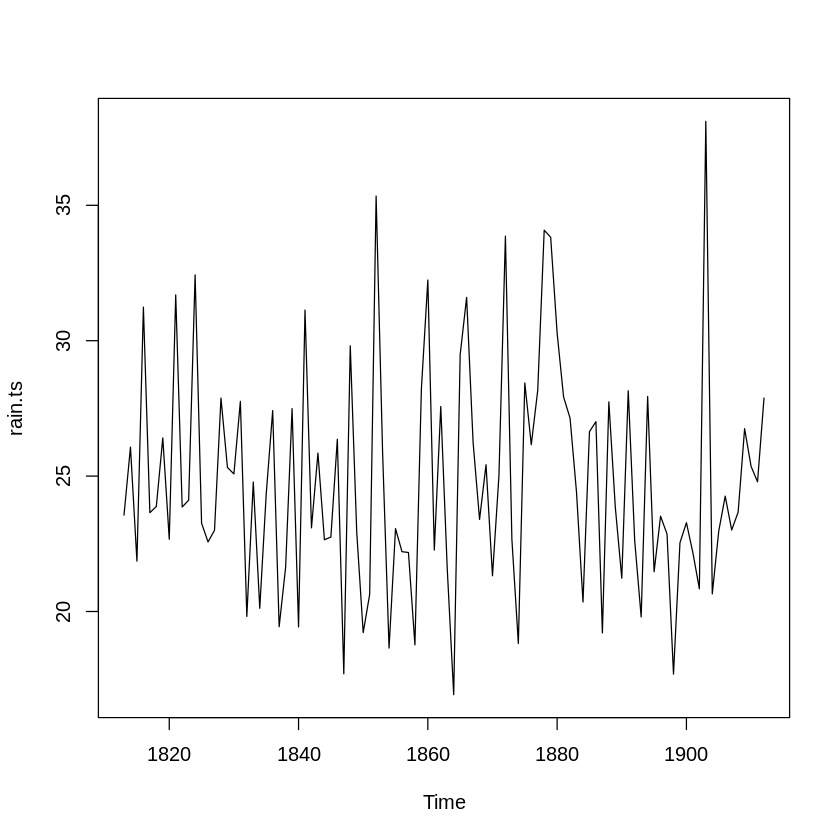

In [ ]:
plot(rain.ts)

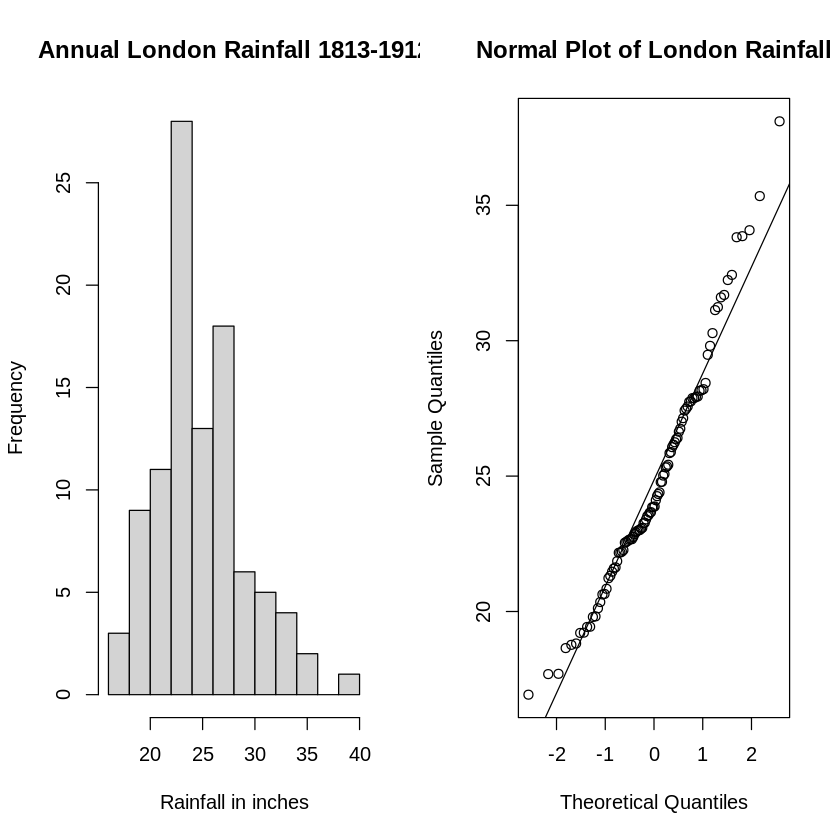

In [ ]:
par(mfrow = c(1, 2))
hist(rain.data, main = "Annual London Rainfall 1813-1912", xlab = "Rainfall in inches")
qqnorm(rain.data, main = "Normal Plot of London Rainfall")
qqline(rain.data)

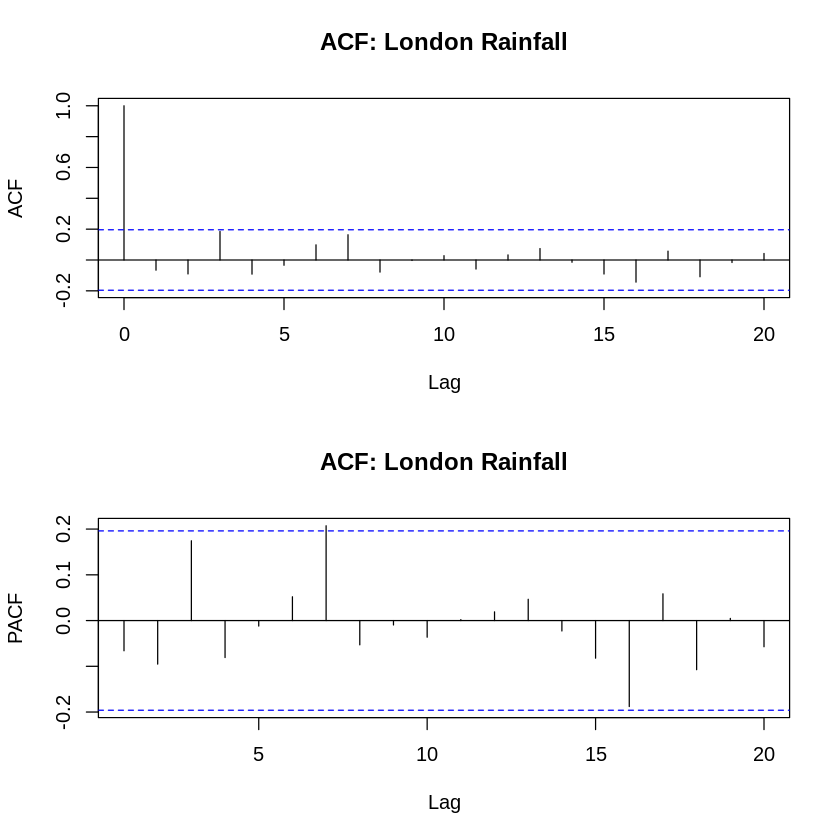

In [ ]:
par(mfrow = c(2, 1))

acf(rain.data, main = "ACF: London Rainfall", ylab = "ACF", xlab = "Lag")
acf(rain.data, type = "partial", main = "ACF: London Rainfall", ylab = "PACF", xlab = "Lag")



In [ ]:
install.packages('forecast')
library("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




In [ ]:
auto.arima(rain.ts)

Series: rain.ts 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
         mean
      24.8239
s.e.   0.4193

sigma^2 estimated as 17.76:  log likelihood=-285.25
AIC=574.49   AICc=574.61   BIC=579.7

In [ ]:
alpha  = 0.02412151 # Increase alpha for more rapid decay
forecast.values = NULL # Establish Array to store forecast values

n = length(rain.data)

# naive first forecast

forecast.values[1] = rain.data[1]

# Loop to create all forecast values

for(i in 1:n){
  forecast.values[i+1] = alpha*rain.data[i] + (1 - alpha)*forecast.values[i]
}

paste("forecast for time", n+1, "=", forecast.values[n+1])

[1] "forecast for time 101 = 24.678193785589"

In [ ]:
#Holt Winters: Exponential smoothing without trend and without seasonal component
HoltWinters(rain.ts, beta = FALSE, gamma = FALSE)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rain.ts, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819